## Imports

Python comes with a lot of features, but there are external packages we use for statistics and data visualization

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats

## Reading data

Pandas dataframes are very similar to excel files and have a lot of the same functionality. However, you can't click around in them

In [33]:
participants = pd.read_excel('data/Fake Participants.xlsx').set_index('Participant')
participants.head()

,Vaccine,Sex,Age,Prior Infection
Participant,,,,
1,Moderna,Male,40,No
2,Moderna,Female,55,No
3,Pfizer,Female,35,No
4,Moderna,Female,45,Yes
5,Pfizer,Male,30,No


In [34]:
samples = pd.read_excel('data/Fake Samples.xlsx')
samples.head()

,Participant,Days from Vaccine,AUC
0,1,48,30806.252969
1,1,104,16539.480441
2,1,132,9055.145294
3,1,160,5582.419017
4,1,188,4152.484662


### Raw AUC Data

Possible to plot, difficult to interpret

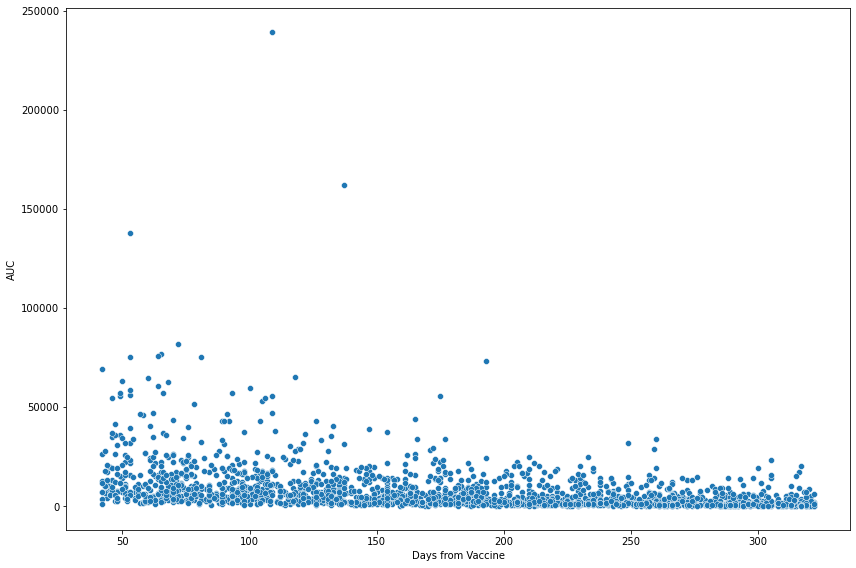

In [43]:
fig, ax = plt.subplots()

sns.scatterplot(data=samples, x='Days from Vaccine', y='AUC')

fig.set_size_inches(12,8)

plt.tight_layout()
plt.show()

### Log transforming data

Since AUC varies across multiple orders of magnitude, observing patterns is much easier after transforming data by taking the logarithm

You can do the same transformation in Excel as well, Python is not unique here

In [44]:
samples['Log2AUC'] = np.log2(samples['AUC'])

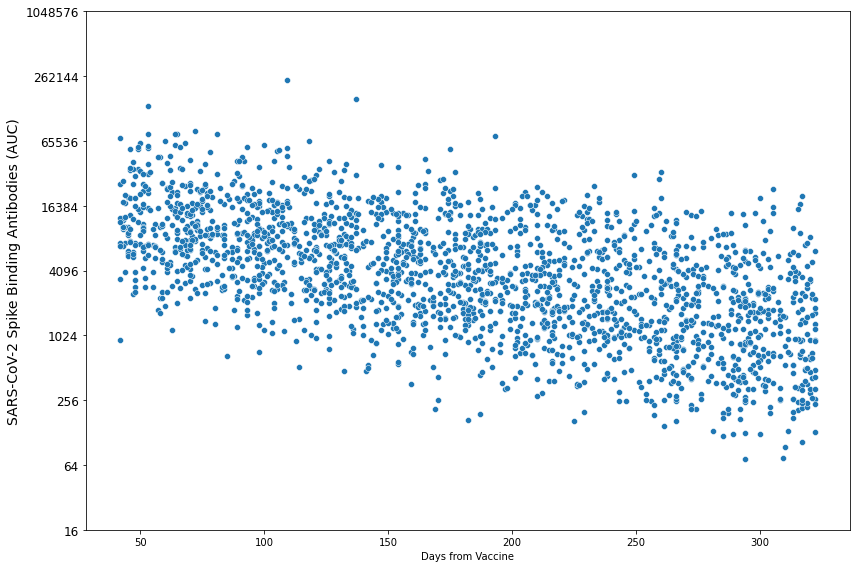

In [45]:
fig, ax = plt.subplots()

sns.scatterplot(data=samples, x='Days from Vaccine', y='Log2AUC')

plt.yticks(ax.get_yticks(), np.exp2(ax.get_yticks()).astype(int), fontsize=12)
ax.set_ylabel('SARS-CoV-2 Spike Binding Antibodies (AUC)', fontsize=14)
fig.set_size_inches(12,8)

plt.tight_layout()
plt.show()

## Combine data from different sources

In [46]:
samples_annot = samples.join(participants, on='Participant', how='left')
samples_annot.head()

,Participant,Days from Vaccine,AUC,Log2AUC,Vaccine,Sex,Age,Prior Infection
0,1,48,30806.252969,14.910936,Moderna,Male,40,No
1,1,104,16539.480441,14.013626,Moderna,Male,40,No
2,1,132,9055.145294,13.144522,Moderna,Male,40,No
3,1,160,5582.419017,12.446675,Moderna,Male,40,No
4,1,188,4152.484662,12.019759,Moderna,Male,40,No


## Plots and analysis relying on participant information

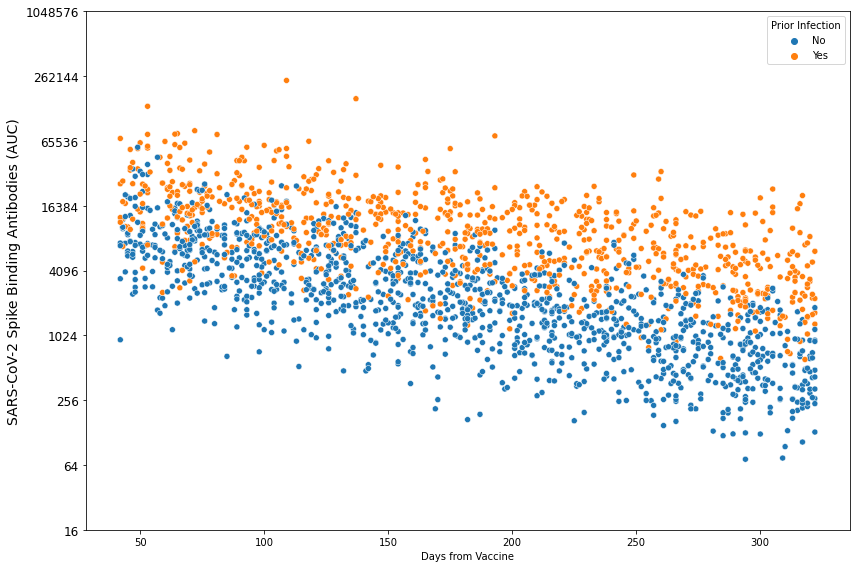

In [47]:
fig, ax = plt.subplots()
sns.scatterplot(data=samples_annot, x='Days from Vaccine', y='Log2AUC', hue='Prior Infection', hue_order=['No', 'Yes'])

plt.yticks(ax.get_yticks(), np.exp2(ax.get_yticks()).astype(int), fontsize=12)
ax.set_ylabel('SARS-CoV-2 Spike Binding Antibodies (AUC)', fontsize=14)
fig.set_size_inches(12,8)

plt.tight_layout()
plt.show()

In [48]:
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

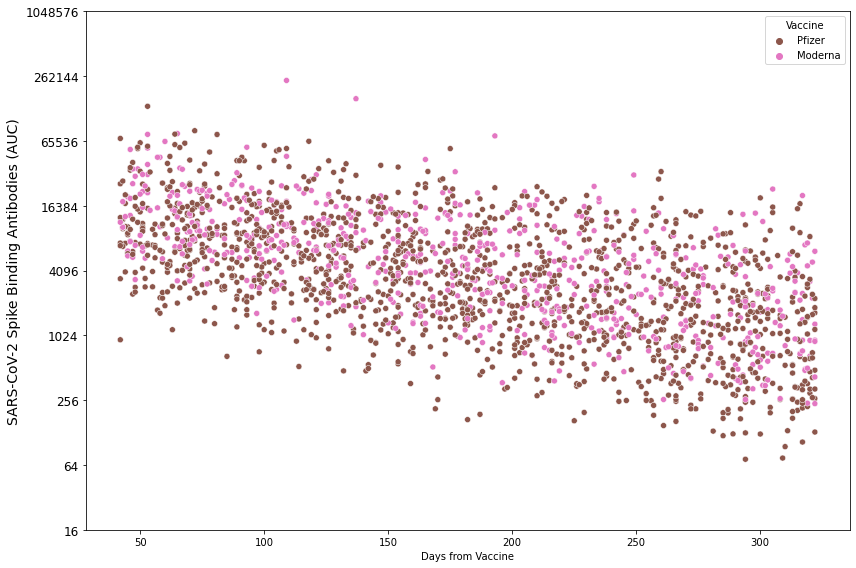

In [49]:
pal = [sns.color_palette()[5], sns.color_palette()[6]]

fig, ax = plt.subplots()

sns.scatterplot(data=samples_annot, x='Days from Vaccine', y='Log2AUC', hue='Vaccine', hue_order=['Pfizer', 'Moderna'], palette=pal)

plt.yticks(ax.get_yticks(), np.exp2(ax.get_yticks()).astype(int), fontsize=12)
ax.set_ylabel('SARS-CoV-2 Spike Binding Antibodies (AUC)', fontsize=14)
fig.set_size_inches(12,8)

plt.tight_layout()
plt.show()

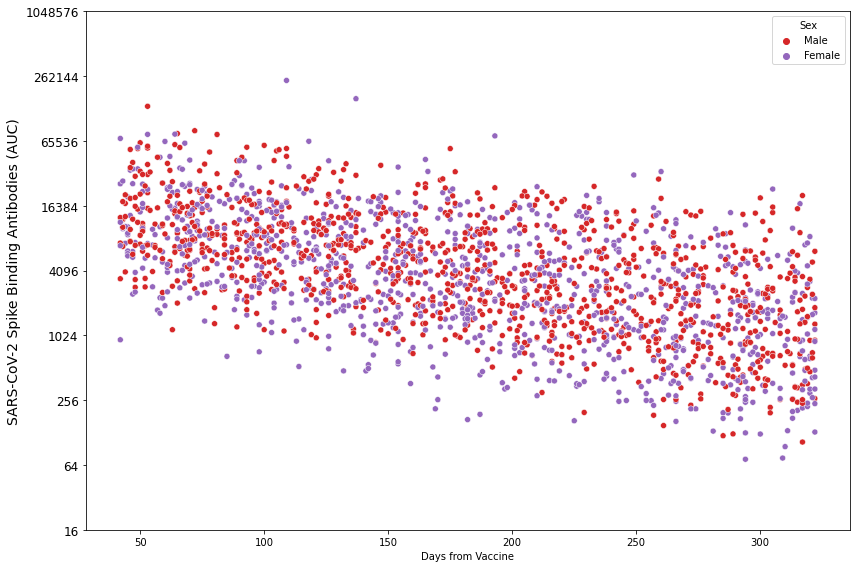

In [50]:
pal = [sns.color_palette()[3], sns.color_palette()[4]]

fig, ax = plt.subplots()

sns.scatterplot(data=samples_annot, x='Days from Vaccine', y='Log2AUC', hue='Sex', hue_order=['Male', 'Female'], palette=pal)

plt.yticks(ax.get_yticks(), np.exp2(ax.get_yticks()).astype(int), fontsize=12)
ax.set_ylabel('SARS-CoV-2 Spike Binding Antibodies (AUC)', fontsize=14)
fig.set_size_inches(12,8)

plt.tight_layout()
plt.show()

### Visual inspection

Looking at your data is good, but there's only so much I can tell here. It's pretty clear that SARS-CoV-2 infection affects post-vaccine antibody level, but I don't see a clear difference based on vaccine type or sex. Here, statistics will be your friend